In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
data = pd.read_csv('../Data/spam.csv', encoding='latin1')
len(data)

5572

In [39]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
data = data[['v1', 'v2']]

In [41]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [42]:
data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [44]:
data.isnull().values.any()

False

In [45]:
data['v2'].nunique()

5169

In [46]:
data.drop_duplicates(subset=['v2'], inplace=True)
len(data)

5169

<Axes: xlabel='v1'>

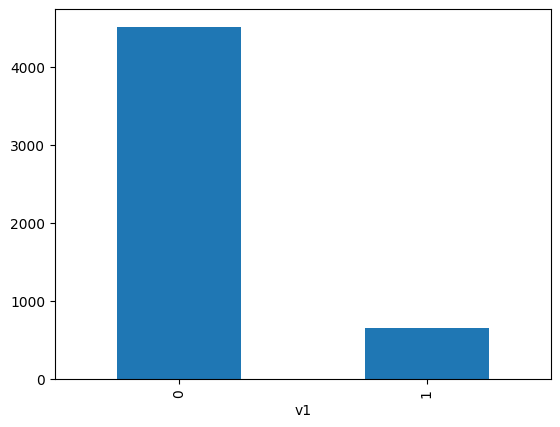

In [47]:
data['v1'].value_counts().plot(kind='bar')

In [48]:
data.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [49]:
X_data = data['v2']
y_data = data['v1']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data)

In [51]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[1813, 1814, 930, 540, 1301, 256, 23, 1525, 19, 2335, 615, 489, 47, 123, 1815, 207, 857, 3, 404, 2336, 207, 2337, 3, 82, 390, 19, 1022, 616, 207], [84, 69, 690, 7, 172, 2, 54, 2338, 18], [46, 61, 4, 438, 858, 24, 61, 4, 735, 133, 3, 931, 40, 236], [257, 236, 1, 557, 1302, 6, 347], [1023, 258, 258, 3487, 16, 3488, 360]]


In [52]:
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'that': 17,
 'on': 18,
 'call': 19,
 'are': 20,
 '2': 21,
 'so': 22,
 'now': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 'at': 28,
 'do': 29,
 'get': 30,
 'be': 31,
 'just': 32,
 "i'm": 33,
 'if': 34,
 'with': 35,
 'no': 36,
 'will': 37,
 'we': 38,
 'up': 39,
 'this': 40,
 'ur': 41,
 'when': 42,
 'gt': 43,
 'lt': 44,
 'go': 45,
 'how': 46,
 'from': 47,
 '4': 48,
 'free': 49,
 'ok': 50,
 'what': 51,
 'out': 52,
 'all': 53,
 'know': 54,
 'then': 55,
 'like': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'time': 60,
 'its': 61,
 'was': 62,
 'am': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'there': 67,
 'love': 68,
 'text': 69,
 'he': 70,
 'one': 71,
 'by': 72,
 'need': 73,
 'send': 74,
 'as': 75,
 'lor': 76,
 'going': 77,
 'about': 78,
 'r': 79,
 'see': 80,
 'home': 81,
 'stop': 82,
 'back': 83,
 "i'll": 84,
 'our

In [53]:
vocab_size = len(word_to_index) + 1
vocab_size

7845

In [54]:
max_len = max(len(sample) for sample in X_train_encoded)
print(max_len)

189


In [55]:
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4135, 189)

In [59]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 5s 60ms/step - loss: 0.3925 - acc: 0.8640 - val_loss: 0.2791 - val_acc: 0.8863
Epoch 2/4
52/52 [==============================] - 3s 59ms/step - loss: 0.1354 - acc: 0.9655 - val_loss: 0.0971 - val_acc: 0.9758
Epoch 3/4
52/52 [==============================] - 3s 51ms/step - loss: 0.0627 - acc: 0.9846 - val_loss: 0.0819 - val_acc: 0.9770
Epoch 4/4
52/52 [==============================] - 3s 54ms/step - loss: 0.0452 - acc: 0.9879 - val_loss: 0.0742 - val_acc: 0.9782


In [57]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 12ms/step - loss: 0.1298 - acc: 0.9565

 테스트 정확도: 0.9565
